In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [8]:
# Fixando a seed para reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

# Criando um dataset simples
X = np.random.rand(10000, 10)
y = np.random.randint(0, 2, size=(10000, 1))


In [9]:
# Criando uma rede neural profunda com função de ativação Sigmoid
model = Sequential()
model.add(Dense(512, input_shape=(10,), activation='sigmoid'))

# Adicionando mais camadas ocultas
for _ in range(10):  # 10 camadas ocultas
    model.add(Dense(512, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

c:\Users\Carlos Carneiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

# Lista para armazenar as médias dos gradientes
gradient_means = []

# Função para calcular os gradientes após cada epoch
class GradientHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        with tf.GradientTape() as tape:
            inputs = tf.constant(X, dtype=tf.float32)
            tape.watch(inputs)
            outputs = model(inputs)
        
        grads = tape.gradient(outputs, model.trainable_variables)
        
        # Garantindo que o gradiente não seja None
        if grads[0] is not None:
            grads_first_layer = grads[0].numpy()
            gradient_mean = np.mean(np.abs(grads_first_layer))  # Usando o valor absoluto para garantir que os gradientes não sejam negativos
            gradient_means.append(gradient_mean)
        else:
            gradient_means.append(0)



In [12]:
# Treinando o modelo com o callback de gradiente
history = model.fit(X, y, epochs=10, batch_size=32, verbose=1, callbacks=[GradientHistory()])


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 0.7163
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.6964
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.6964
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.6964
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - loss: 0.6964
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.6964
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.6964
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.6963
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.6963
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.6963


In [6]:


# Exibindo os gradientes da primeira camada
with tf.GradientTape() as tape:
    inputs = tf.constant(X, dtype=tf.float32)
    tape.watch(inputs)
    outputs = model(inputs)

grads = tape.gradient(outputs, model.trainable_variables)
grads_first_layer = grads[0].numpy()

print("Média dos gradientes da primeira camada:", np.mean(grads_first_layer))


Média dos gradientes da primeira camada: -1.7531413e-12


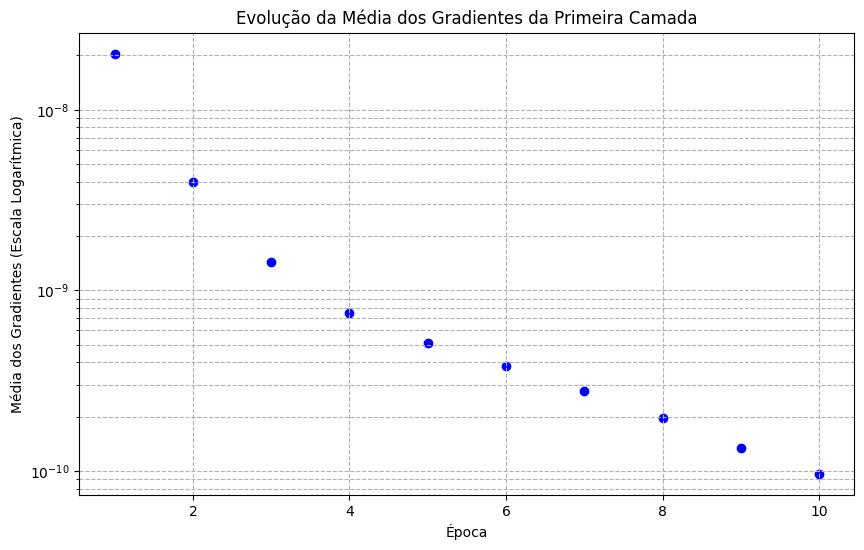

In [14]:
import matplotlib.pyplot as plt

# Plotando a evolução da média dos gradientes ao longo das épocas
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(gradient_means) + 1), gradient_means, color='blue')
plt.title('Evolução da Média dos Gradientes da Primeira Camada')
plt.xlabel('Época')
plt.ylabel('Média dos Gradientes (Escala Logarítmica)')
plt.yscale('log')  # Escala logarítmica para visualizar valores pequenos
plt.grid(True, which="both", ls="--")
plt.show()